#  Introduction

##  Overview & Objectives

Solar radiation refers the electromagnetic radiation from the sun which is in the form of energy. This energy is essential for life on earth and it directly affects earth's climate and all lives on the earth. Solar radiation prediction is critical in many different fields such as energy management, solar power generation, and weather forecasting. 

Linear regression is a statistical model that can be used to predict the solar radiation depending on the selected features. Using machine learning tools to predict solar radiation is quite useful since it could allow us to answer questions such as 'On what days the solar radiation would surpass normal amounts?', 'How to optimize charging our solar batteries?', 'Depending on a given temperature of a given day, what would be the solar radiation?'. 

A common way to create a linear regression model is to use historical data of solar radiation data gathered from sensors. And use the solar radiation data as the target variable and selected features as the training feature variable. Later, we fit this data into the training set and use the training set to predict solar radiation depending on the selected feature. Depending on the results we arrive at, polynomial regression and feature engineering can get applied as well. 

Finally, linear regression provides a simple practical prediction model for solar radiation, which in return deeply contributes the solar power optimization and advancement of clean energy. 

## Dataset

The Solar Prediction data found on Kaggle.com as open data was gathered from a task in a NASA Hackathon by the user Andrey. The dataset The data file was directly downloaded from Kaggle. The file format is comma-separated values (CSV). [1] 

Since the data is open on Kaggle, it is ethically appropriate to use the data however the author other than mentioning the source did not provide a link to the dataset's source namely the NASA Hackathon. 

This is a relatively small dataset with 32,868 instances and 11 features and a size of 2.89 MB. The features in this dataset are gathered by sensors and are as follows: UNIXTime, Data, Time, Radiation, Temperature, Pressure, Humidity, WindDirection(Degrees), Speed, TimeSunRise, and TimeSunSet. The six numerical column data types are either float64 or int64 and there weren't any null values or duplicate values in the dataset. The dataset is already in its first normal form (1NF) already, therefore other than making sure there are no null or duplicate values there was no need to too much preprocess this clean dataset. 

To create the linear regression model, after thoroughly analyzing and exploring the dataset's statistical summary and the relationship between Radiation and each and every one of the numerical features, decided to use temperature as the selected feature to fit the regression model. 


#  Implementation

## Preprocessing

Here we start importing the data using pandas and transform the data from CSV to dataframe.

In [1]:
# importing the dataset
# my code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

data = pd.read_csv('SolarPrediction.csv')

Dropping any duplicate values:

In [2]:
# my code
data = data.drop_duplicates()

Dropping any null values:

In [3]:
# my code
data = data.dropna()

Using sns heatmap function, I am checking for null data below. It seems like there is no null data here:

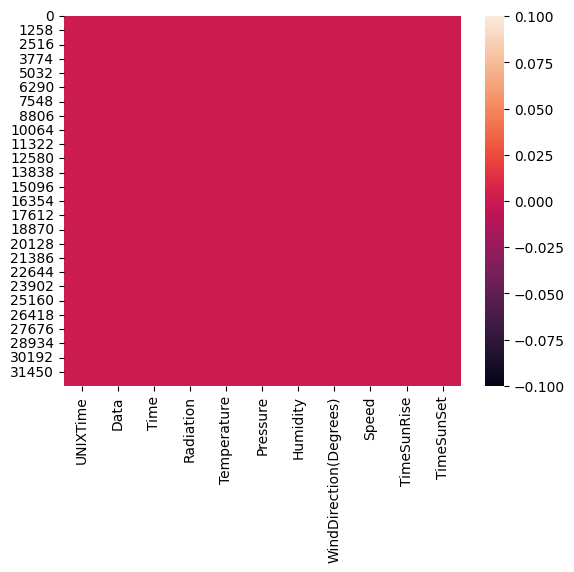

In [4]:
# my code
ax = sns.heatmap(data.isnull())

Dropping the UNIXTime, Data, Time, TimSunRise, TimeSunSet features since they would definitely not be a good predictor for the solar radiation.

In [5]:
# my code
selected_features = ['Radiation', 'Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']
data = data[selected_features]

## Statistical Summary

In [6]:
# dataset summary
# my code
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32686 non-null  float64
 1   Temperature             32686 non-null  int64  
 2   Pressure                32686 non-null  float64
 3   Humidity                32686 non-null  int64  
 4   WindDirection(Degrees)  32686 non-null  float64
 5   Speed                   32686 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.5 MB


Taking a look at the table: 

In [7]:
# my code
data.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [8]:
# Looking at the first few instances
# my code
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62


In [9]:
# my code
data.shape

(32686, 6)

Here I measure the statistical summary of data - starting from measure of central tendency: 

In [10]:
# Measure of Central Tendency 
# my code
print(data.mean())   #mean

Radiation                 207.124697
Temperature                51.103255
Pressure                   30.422879
Humidity                   75.016307
WindDirection(Degrees)    143.489821
Speed                       6.243869
dtype: float64


In [11]:
# Measure of Central Tendency 
# my code
print(data.median()) #median

Radiation                   2.66
Temperature                50.00
Pressure                   30.43
Humidity                   85.00
WindDirection(Degrees)    147.70
Speed                       5.62
dtype: float64


In [12]:
# Measure of Central Tendency 
# my code
print(data.mode())   #mode

   Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed
0       1.22           45     30.44       102                    0.11   5.62


Then moving on to measure of spread:

In [13]:
# Measure of Spread 
# my code
print(data.max()-data.min()) #range

Radiation                 1600.15
Temperature                 37.00
Pressure                     0.37
Humidity                    95.00
WindDirection(Degrees)     359.86
Speed                       40.50
dtype: float64


In [14]:
# Measure of Spread 
# my code
print(data.var()) #variance

Radiation                 99803.163698
Temperature                  38.454353
Pressure                      0.002989
Humidity                    675.491458
WindDirection(Degrees)     6916.832998
Speed                        12.183406
dtype: float64


In [15]:
# Measure of Spread 
# my code
print(data.std()) #standard deviation

Radiation                 315.916387
Temperature                 6.201157
Pressure                    0.054673
Humidity                   25.990219
WindDirection(Degrees)     83.167500
Speed                       3.490474
dtype: float64


It seems like Radiation has the highest spread and variation in the data with Pressure having the lowest.

To view the type of distribution I decided to visualize the data : 

## Data Visualization

Exploring the data using data visualization techniques. Through this process we can find the perfect feature to build the regession model based on.

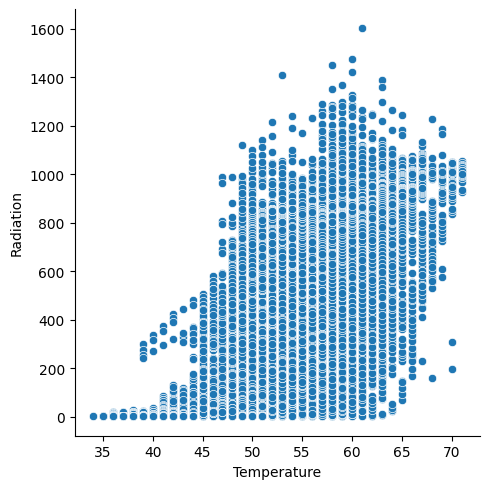

In [16]:
# Radiation vs. Temperature
# my code inspired by seaborn documentation https://seaborn.pydata.org/tutorial.html
sns.relplot(data=data, x="Temperature", y="Radiation")

From above, we can see a somewhat direct relationship. It would seem like that temperature can be a good predictor for solar radiation.

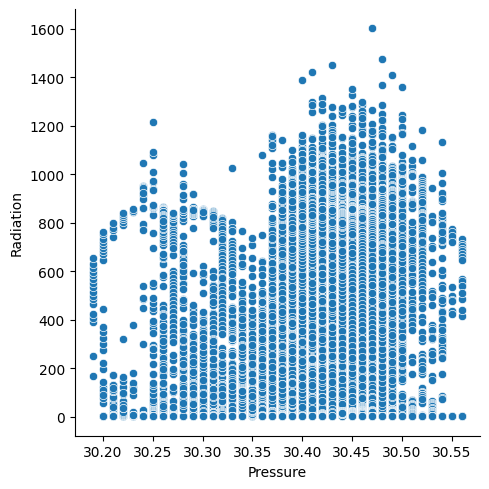

In [17]:
# Pressure vs. Radiation
# my code inspired by seaborn documentation https://seaborn.pydata.org/tutorial.html
sns.relplot(data=data, x="Pressure", y="Radiation")

Pressure seems much more scattered vs Radiation, therefore, it would not be a good linear regression feature.

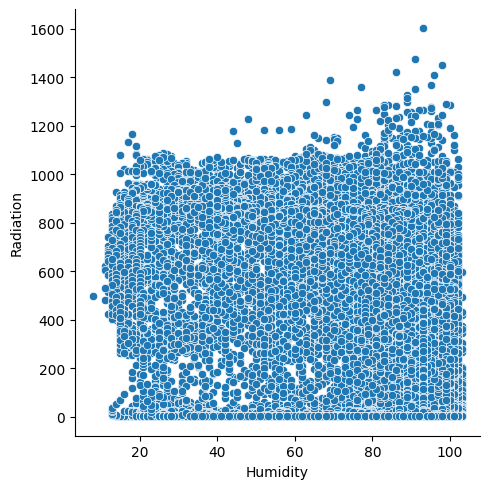

In [18]:
# Humidity vs. Radiation
# my code inspired by seaborn documentation https://seaborn.pydata.org/tutorial.html
sns.relplot(data=data, x="Humidity", y="Radiation")

A lot more scattered than Humidity. There is definitely no direct relationship between Humidity and solar Radiation.

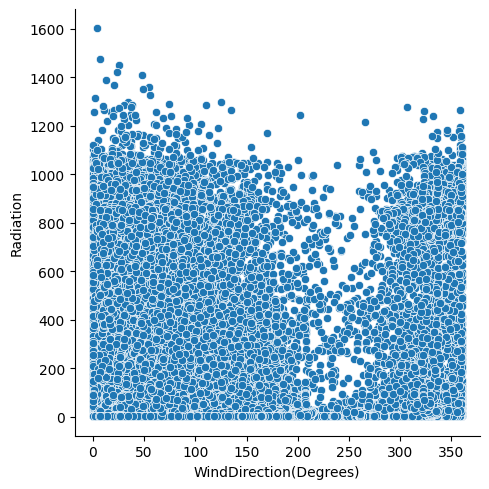

In [19]:
# Humidity vs. Radiation
# my code inspired by seaborn documentation https://seaborn.pydata.org/tutorial.html
sns.relplot(data=data, x="WindDirection(Degrees)", y="Radiation")

Wind Direction wouldn't be a good predictor for solar radiation as you can see above. 

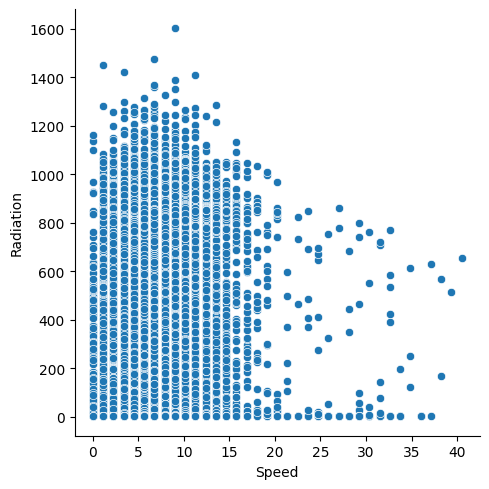

In [20]:
# Humidity vs. Speed
# my code inspired by seaborn documentation https://seaborn.pydata.org/tutorial.html
sns.relplot(data=data, x="Speed", y="Radiation")

Speed might be an interesting feature to consider.

## Machine Learning Model

Here we start to create our linear regression model. From the data visualization we can consider the following features for the linear regression confidently: Temperature, Humidity, Speed.

In [21]:
# split the data into test, train sets
#my code
X = data[['Temperature']]
y = data['Radiation']


# Creating 20% testing set and 80% training set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
# inspired by the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

reg = LinearRegression().fit(X_train,y_train)

In [23]:
# Linear Regression Score
# inspired by the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
reg.score(X_train, y_train)

0.5422136529459337

In [24]:
#Linear Regression Coef - holds the slop of the line
# inspired by the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
reg.coef_

array([37.42170791])

In [25]:
# Regression Model intercept
# inspired by the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
reg.intercept_

-1705.0280934479606

## Validation

In [26]:
# inspired by the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# prediction 
y_fit = reg.predict(X_test)

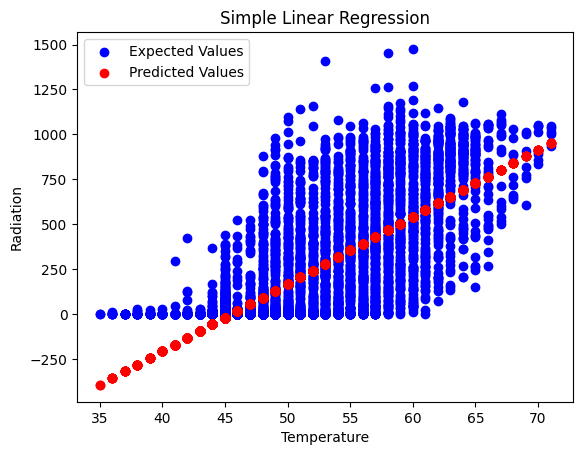

In [27]:
# plotting the Expected Values & Predicted Values
# my code
fig, ax = plt.subplots()
ax.scatter(X_test,y_test, color='blue', label='Expected Values')
ax.scatter(X_test,y_fit, color='red', label = 'Predicted Values')
ax.set_xlabel('Temperature')
ax.set_ylabel('Radiation')
ax.set_title('Simple Linear Regression')
plt.legend()
plt.show()

In [45]:
# RMSE
# inspired by scikit learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
mean_squared_error(y_test, y_fit)

47091.81529772375

As you can see above the simple linear regression model, didn't create a very fit model to be used as the predictor. This is why I'll make an attempt in using the polynomial regression, inspired by the lectures.

In [28]:
#From lecture - creating a helper function
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [29]:
# From lectures
# 2nd degree polynomial
y_fit_2 = PolynomialRegression(2).fit(X_train,y_train).predict(X_test)

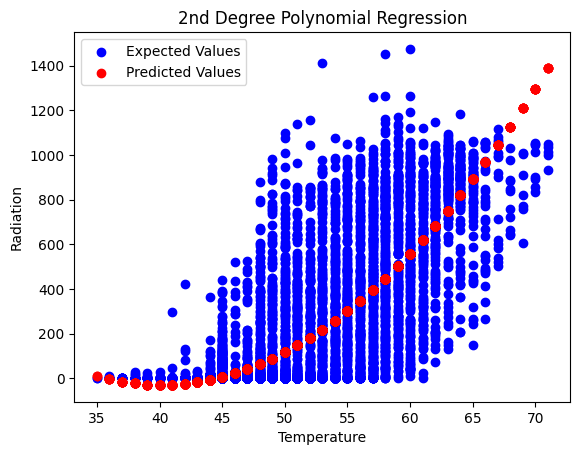

In [30]:
#my code
# plotting the Expected Values & Predicted Values
# plotting against the expected values
fig, ax = plt.subplots()
ax.scatter(X_test,y_test, color='blue', label='Expected Values')
ax.scatter(X_test,y_fit_2, color='red', label = 'Predicted Values')
ax.set_xlabel('Temperature')
ax.set_ylabel('Radiation')
ax.set_title('2nd Degree Polynomial Regression')
plt.legend()
plt.show()

In [43]:
# RMSE
# inspired by scikit learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
mean_squared_error(y_test, y_fit_2)

43369.46698940343

In [31]:
# 3rd degree polynomial
# From lectures
y_fit_3 = PolynomialRegression(3).fit(X_train,y_train).predict(X_test)

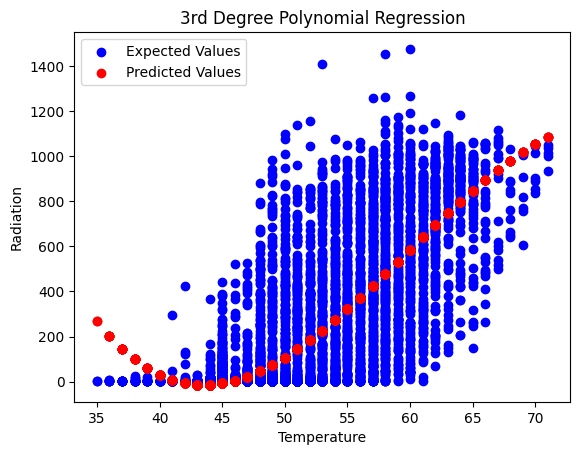

In [32]:
# my code
# plotting against the expected values
fig, ax = plt.subplots()
ax.scatter(X_test,y_test, color='blue', label='Expected Values')
ax.scatter(X_test,y_fit_3, color='red', label = 'Predicted Values')
ax.set_xlabel('Temperature')
ax.set_ylabel('Radiation')
ax.set_title('3rd Degree Polynomial Regression')
plt.legend()
plt.show()

In [42]:
# RMSE
# inspired by scikit learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
mean_squared_error(y_test, y_fit_3)

42537.01882765287

In [33]:
# 4th degree polynomial
# From lectures
y_fit_4 = PolynomialRegression(4).fit(X_train,y_train).predict(X_test)

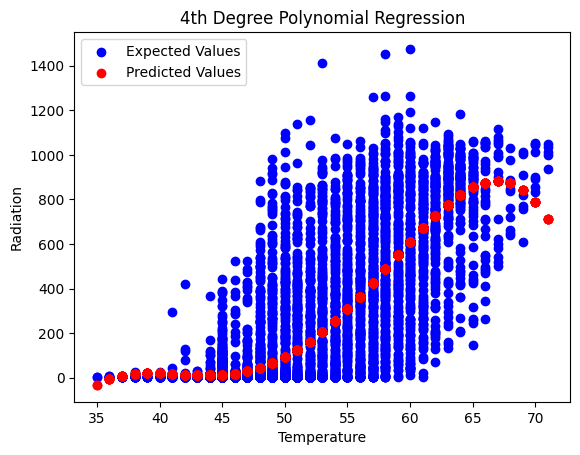

In [34]:
# my code
# plotting against the expected values
fig, ax = plt.subplots()
ax.scatter(X_test,y_test, color='blue', label='Expected Values')
ax.scatter(X_test,y_fit_4, color='red', label = 'Predicted Values')
ax.set_xlabel('Temperature')
ax.set_ylabel('Radiation')
ax.set_title('4th Degree Polynomial Regression')
plt.legend()
plt.show()

In [35]:
#score value for 4th polynomial regression
PolynomialRegression(4).fit(X_train,y_train).score(X_train,y_train)

0.6033718185168081

In [40]:
# RMSE
# inspired by scikit learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
mean_squared_error(y_test, y_fit_4)

42082.145235071366

Fourth degree polynomial regression model gave us the best result as you can see in the image above. 

In [36]:
# 5th degree polynomial
# From lectures
y_fit_5 = PolynomialRegression(5).fit(X_train,y_train).predict(X_test)

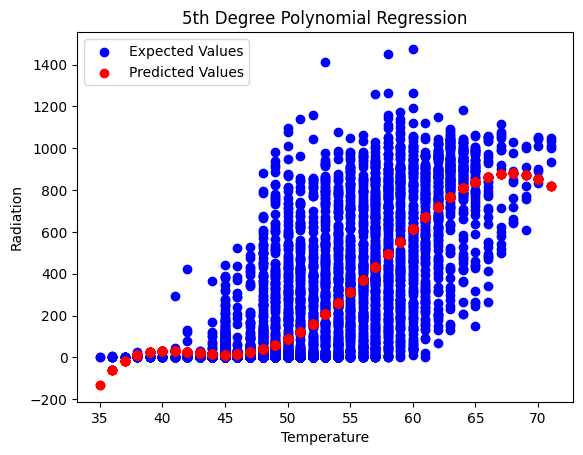

In [37]:
# my code
# plotting against the expected values
fig, ax = plt.subplots()
ax.scatter(X_test,y_test, color='blue', label='Expected Values')
ax.scatter(X_test,y_fit_5, color='red', label = 'Predicted Values')
ax.set_xlabel('Temperature')
ax.set_ylabel('Radiation')
ax.set_title('5th Degree Polynomial Regression')
plt.legend()
plt.show()

In [41]:
# RMSE
# inspired by scikit learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
mean_squared_error(y_test, y_fit_5)

42036.377940716855

5th degree polynomial seems over fitting at first glance and not as good. However, as you can see the RMSE values is consistently less than other variations of the model.

## Feature Engineering

The only feature engineering used in this project was dropping non-numerical columns earlier in preprocessing section since we couldn't find a direct relationship between the non-numerical features and solar radiation. there was not much need for feature engineering since the data used in this analysis was all numerical data without any noise. We also made sure to remove null and duplicated data.

# Conclusion

In this project, a regression model was successfully used to create a solar radiation prediction model. Initially, we explored the dataset and found 'temperature' as the most suitable feature used. Later, we split the data into 80% and 20% sets, respectively training and testing sets, and create a simple linear regression model. Plotting the predicted values against the expected values displayed the limitation of the simple regression model. Hence, a polynomial regression model was made to create a more accurate prediction model.

Starting from a second-degree polynomial, the model was tested, plotted, and validated to find the best polynomial degree that fits the solar radiation dataset. second-degree and third-degree provided similar results however as we increased the polynomial degree, the root mean square values were consistently decreased. The fourth-order polynomial regression seemed at first the best fit, from just observing the plot of predicted values against the expected values, however, the fifth-order polynomial provided the least root mean square values of 42036.38.  The root mean squared values are expectedly very large due to the vast spread in temperature values. As you can see in section 2.3, all features in this dataset have a large spread and are very scattered and the temperature seemed reasonably more. 

Finally, the solar prediction model was successfully developed though the application of regression techniques. 

# Reference 

[1] SolarEnergy, Kaggle.com, https://www.kaggle.com/datasets/dronio/SolarEnergy


[2] Scikit-Learn Documentation, https://scikit-learn.org/


[3] Seaborn Documentation, https://seaborn.pydata.org/tutorial.html


[4] Data Science Class Lectures